In [6860]:
#Import required packages
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import scipy.optimize as opt

In [6861]:
#Create necessary functions:

def ScaledPoisson(x,A,mu):
    #Scaled Poisson distr. to fit to
    return A*stats.poisson.pmf(x,mu)

def plotSignalOverTime(x,y):
    fig,ax = plt.subplots()
    ax.plot(x/60,y)
    ax.set_xlabel('Time / Minutes')
    ax.set_ylabel('Counts per repetition')
    return fig,ax

def plotDistribution(X,guess,start = 0):
    #Makes plot of data distribution (with automatic axis labels) and sqrt(y) error and fits to poisson
    #parameters:
    #x -- np.array to plot along x axis
    #y -- np.array to plot along y axis
    #guess = [A,mu] -- array with amplitude and mean value guess for the scaled poisson distribution.
    x,y = countOccurence(X,start = start)
    fig,ax = plt.subplots()
    ax.errorbar(x,y,np.sqrt(y), markersize = 2, ls = '',color = 'k',marker = 'o')
    ax.set_xlabel('Counts in a repetition')
    ax.set_ylabel('Frequency')
    
    sigma_var = np.sqrt(np.sum(1/(len(X)**2)*X)+1/(len(X)**2)*np.sum(X))
    
    popt,pcov = opt.curve_fit(ScaledPoisson,x,y,p0 = guess,sigma = np.sqrt(y+1),absolute_sigma= True)
    ax.plot(x,ScaledPoisson(x,popt[0],popt[1]))
    fig.suptitle(rf'$\sigma^2 = {np.std(X)**2:.2f}\pm {sigma_var:.2f}$,   $\mu = {popt[1]:.2f}\pm{(np.sqrt(pcov[1,1])):.2f}$')


    return fig,ax,(popt,pcov)

def countOccurence(N,start = 0):
    #Count the occurence of each element in N
    #Parameters -- np.array to count elements of

    #Returns:
    # NSorted -- Ion count values sorted from highest to lowest
    # Occurences -- number of times each N in NSorted was counted
    NSorted = []
    Occurences = []
    for j in np.arange(start,np.max(N)+20): #Silly hack, but helps with the formatting
        NSorted.append(j)
        Occurences.append(list(N).count(j))
    return np.array(NSorted), np.array(Occurences)

def loadData(datafile,skip):
    #Load the recorded data and return a 
    
    #Parameters:
    # datafile -- txt file with 3 columns, first column is always 300, 2nd is number of ions in a repetition and 3rd is the time of the repetition
    # skip -- number of rows to skip when loading datafile

    #Returns:
    #Ns -- np array with number of counts for each repetition
    #times -- time.time() value when the measurement was made
    loader = np.loadtxt(datafile,skiprows = skip, delimiter = ',')
    filter = loader[:,0]!=0
    Ns = loader[:,1][filter]
    times = loader[:,2][filter]
    return Ns, times

In [6862]:
#Load data

NTEST,tTest = loadData(r'C:\Users\shd-iontrap-lab\Desktop\ESI Code\20nsRise_200us_13_11_2024.txt',skip = 1)

nSortedTEST, occurencesTEST = countOccurence(NTEST[NTEST!=0])



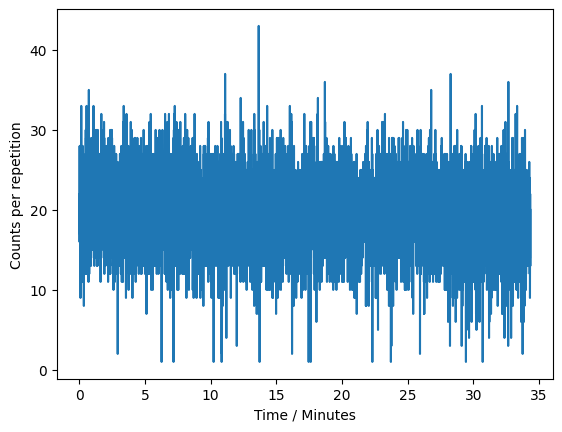

In [6863]:
figSigTEST,axSigTEST, = plotSignalOverTime(tTest[NTEST!=0],NTEST[NTEST!=0])

This data looks good. No processing needed.

[6866.80932638   19.32342144]


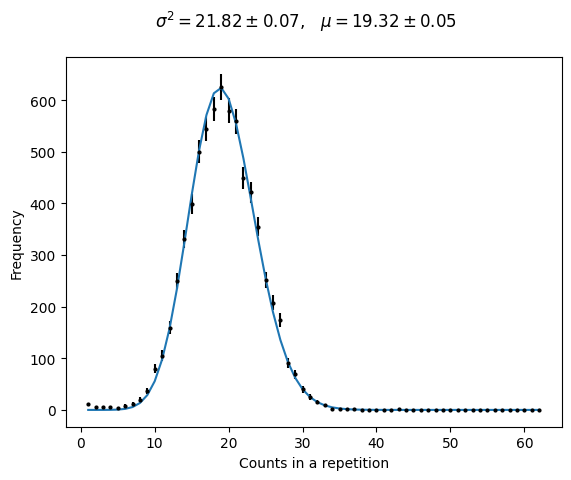

In [6864]:
figTEST,axTEST,[popt,pcov] = plotDistribution(NTEST[NTEST!=0],[1000,20],start = 1)
print(popt)

In [6865]:
# #Load data

# NTEST,tTest = loadData(r'C:\Users\shd-iontrap-lab\Desktop\ESI Code\20nsRise_200us_13_11_2024_4uL.txt',skip = 1)

# nSortedTEST, occurencesTEST = countOccurence(NTEST)

In [6866]:
# figSigTEST,axSigTEST = plotSignalOverTime(tTest,NTEST)

This data is not so terribly nice. Let's cut away the first 3.5 minutes

In [6867]:
# filter1 = tTest/60>3.5
# figSigTEST,axSigTEST = plotSignalOverTime(tTest[filter1],NTEST[filter1])

Better!

In [6868]:
# figTEST,axTEST,__ = plotDistribution(NTEST[filter1],[10000,20])

In [6869]:
#Load data

NTEST,tTest = loadData(r'C:\Users\shd-iontrap-lab\Desktop\ESI Code\20nsRise_200us_13_11_2024_2uLAGAIN.txt',skip = 1)

nSortedTEST, occurencesTEST = countOccurence(NTEST)

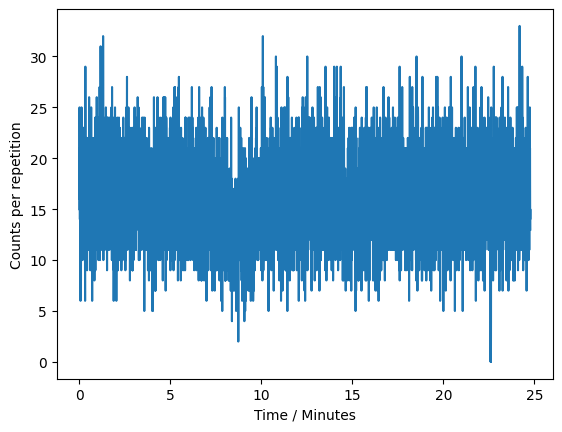

In [6870]:
figSigTEST,axSigTEST = plotSignalOverTime(tTest,NTEST)

Mostly nice, but there is a bit of a dip around 8 minutes. Let's remove that!

[ True  True  True ...  True  True  True]
5045 4638


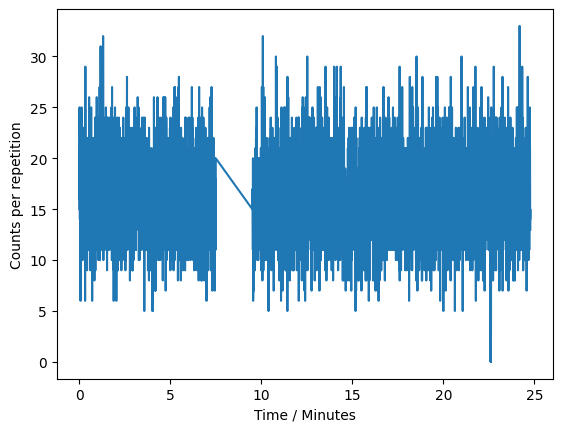

In [6871]:
filter1 = tTest/60<7.5
filter2 = tTest/60>9.5
filter = np.bitwise_or(filter1,filter2)
print(filter)
figSigTEST,axSigTEST = plotSignalOverTime(tTest[filter],NTEST[filter])
print(len(tTest),len(tTest[filter]))

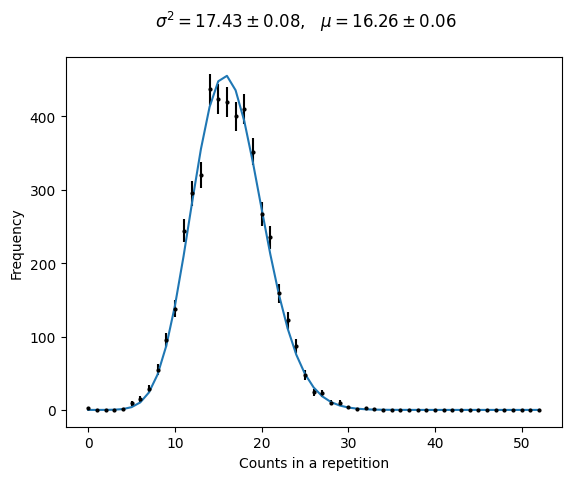

In [6872]:
figTEST,axTEST,__ = plotDistribution(NTEST[filter],[10000,20])

In [6873]:
#Load data

NTEST,tTest = loadData(r'C:\Users\shd-iontrap-lab\Desktop\ESI Code\20nsRise_50ms_13_11_2024_2uL.txt',skip = 1)

nSortedTEST, occurencesTEST = countOccurence(NTEST)

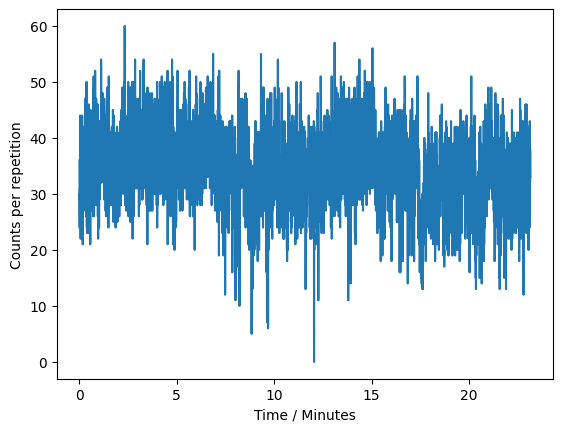

In [6874]:
figSigTEST,axSigTEST = plotSignalOverTime(tTest,NTEST)

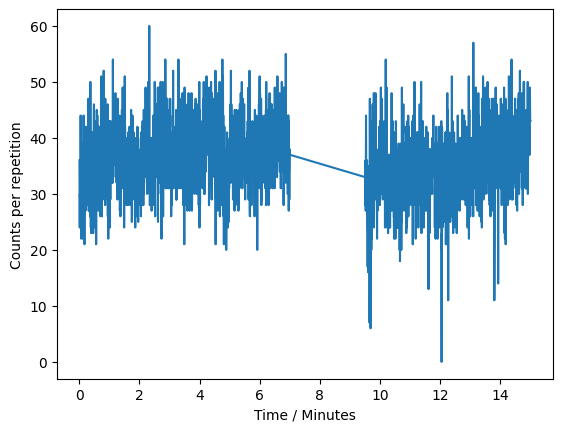

In [6875]:
filter1 = tTest/60 <7
filter2 = tTest/60>9.5
filter3 = tTest/60<15

filter12 = np.bitwise_or(filter1,filter2)
filter = np.bitwise_and(filter12,filter3)
figSigTEST,axSigTEST = plotSignalOverTime(tTest[filter],NTEST[filter])

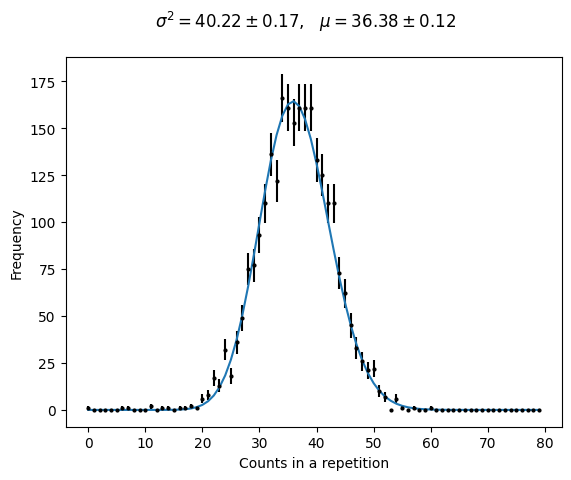

In [6876]:
figTEST,axTEST,__ = plotDistribution(NTEST[filter],[10000,20])

In [6877]:
#Load data

NTEST,tTest = loadData(r'C:\Users\shd-iontrap-lab\Desktop\ESI Code\TEST.txt',skip = 1)

nSortedTEST, occurencesTEST = countOccurence(NTEST)


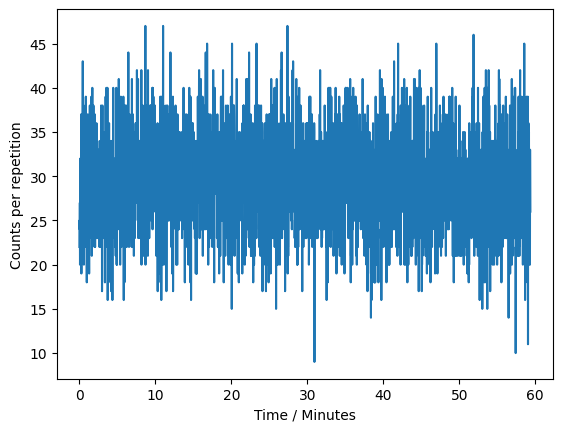

In [6878]:
figSigTEST,axSigTEST = plotSignalOverTime(tTest,NTEST)

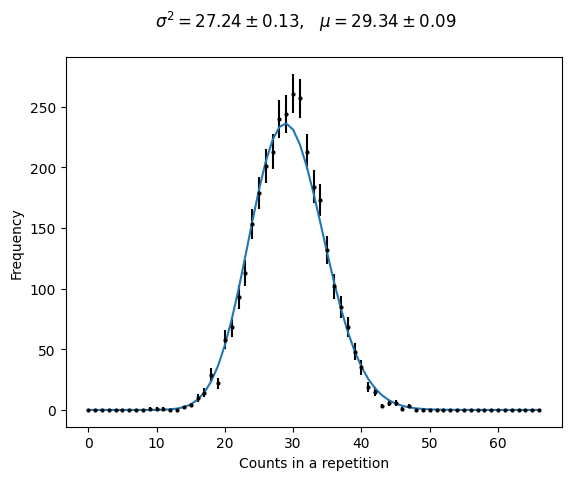

In [6879]:
figTEST,axTEST,__ = plotDistribution(NTEST,[1600,30])